In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
I_maglim = [5807393, 5807403, 5057729, 5059653, 4126669, 5059227, 38803, 39181, 39431, 39619, 39655, 40005, 40107, 40147, 40588, 40604, 41567, 41829, 42768, 41440, 37814, 39344, 13756, 14548, 14590]
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]


########### Updated list using the color-LogWimx correaltion


In [3]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

In [4]:
band = 'g'
Clusters, slope0, zp0, slope_e0 = TF_iter(table, band = band, n_iter=10, verbose=False, 
                                            addSouth=False, pgcFaint=I_maglim)
print slope0, zp0

zp_calibs = all_ZP(table, band=band, slope=slope0, pgcFaint=calib_maglim)
slope = zp_calibs['slope']
zp    = zp_calibs['zp']
zp_e = zp_calibs['zp_e']
print slope0, slope_e0, slope, zp

-7.370193787547213 0.000983084424275734
-7.370193787547213 0.1313945629400118 -7.370193787547213 -20.148567275189283


In [5]:
d_lst = []
de_lst = []
keys = []
for i, key in enumerate(Clusters):
        myCluster = Clusters[key]
        #print key, myCluster['slope'], myCluster['zp']-zp
        
        d_modulus = myCluster['zp']-zp
        d_modulus_e = myCluster['zp_e']
        d_lst.append(d_modulus)
        de_lst.append(d_modulus_e)
        keys.append(key)

print 

indx  = np.argsort(d_lst)

   
    
for i in indx:
    key = keys[i]
    myCluster = Clusters[key]
    
    pgc = myCluster['pgc']
    indx = []
    indx_ = []    
    for jj, id in enumerate(pgc):
        if not id in I_maglim:
            indx.append(jj)
        else:
            indx_.append(jj)      
    
    
    print myCluster['name']+ ' & g & a & '+'%d'%len(pgc[indx])+' & '+'%.2f'%d_lst[i]+ ' & '+'%.2f'%de_lst[i][0]
    


Virgo & g & a & 24 & 30.94 & 0.09
Ursa Major & g & a & 36 & 31.34 & 0.07
Pegasus & g & a & 24 & 33.31 & 0.11
Abell 262 & g & a & 6 & 33.63 & 0.23
NGC507 & g & a & 20 & 33.92 & 0.11
NGC410 & g & a & 33 & 33.96 & 0.07
Cancer & g & a & 18 & 34.08 & 0.10
NGC70 & g & a & 11 & 34.55 & 0.11
NGC80 & g & a & 14 & 34.56 & 0.08
Abell 1367 & g & a & 68 & 34.64 & 0.06
Coma & g & a & 79 & 34.67 & 0.06
Abell 400 & g & a & 21 & 34.71 & 0.07
NGC4065 & g & a & 14 & 35.01 & 0.07
Abell 2634/66 & g & a & 29 & 35.23 & 0.07
Abell 2151 (Hercules) & g & a & 39 & 35.76 & 0.06


0 NEST_100002 Virgo
0.39655398269717246 NEST_100008 UMa
2.3630925505771554 NEST_200092 Pegasus
2.6920603885516456 NEST_200003 A262
2.9799660135306336 NEST_200006 N507
3.0215752570237733 NEST_200005 N410
3.1385537467487854 NEST_100030 Cancer
3.611359262100647 NEST_200037 N70
3.616427441021248 NEST_200045 N80
3.6939856445902617 NEST_100005 A1367
3.7268945084192993 NEST_100001 Coma
3.766036162746067 NEST_200012 A400
4.062688233568728 NEST_100018 N4065
4.292234778944616 NEST_200016 A2634/66
4.817967209284927 NEST_100007 Hercules


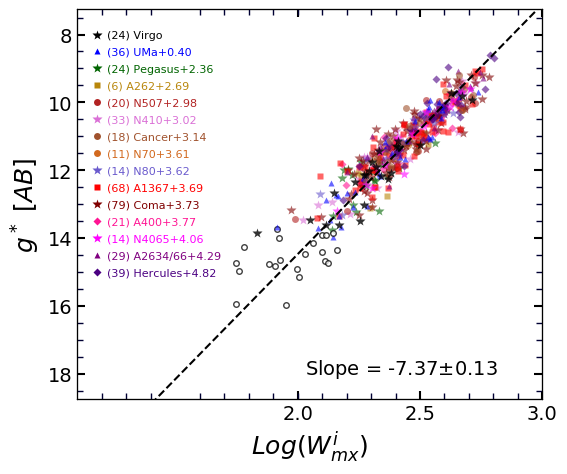

In [6]:
dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}
cmap = get_cmap(21)
fig, ax = makeFig(band=band, xLim = (1.1,2.9), yLim = (18.75,7.25), MAGabs=False)

key0 = 'NEST_100002'
myCluster = Clusters[key0]
zp_virgo = myCluster['zp']
I_mag = myCluster['mag']
logWimx = myCluster['logWimx']
pgc_ = myCluster['pgc']


symcol = {}
symcol['NEST_100002']=['Virgo', '*', 'black']
symcol['NEST_100008']=['UMa', '^', 'blue']
symcol['NEST_200015']=['Fornax', 's', 'green']
symcol['NEST_100003']=['Centaurus', 'D', 'dodgerblue']
symcol['NEST_100014']=['Antlia', '.', 'olive']
symcol['NEST_200092']=['Pegasus', '*', 'darkgreen']
symcol['NEST_100006']=['Hydra', '^', 'm']
symcol['NEST_200003']=['A262', 's', 'darkgoldenrod']
symcol['NEST_200005']=['N410', '*', 'orchid']
symcol['NEST_200006']=['N507', '.', 'firebrick']
symcol['NEST_100030']=['Cancer', '.', 'sienna']
symcol['NEST_200045']=['N80', '*', 'slateblue']
symcol['NEST_200037']=['N70', '.', 'chocolate']
symcol['NEST_100005']=['A1367', 's', 'red']
symcol['NEST_100001']=['Coma', '*', 'maroon']
symcol['NEST_200012']=['A400', 'D', 'deeppink']
symcol['NEST_100018']=['N4065', '*', 'magenta']
symcol['NEST_200017']=['A539', 's', 'crimson']
symcol['NEST_200016']=['A2634/66', '^', 'purple']
symcol['NEST_100007']=['Hercules', 'D', 'indigo']



key_lst = []
d_lst = []
n_lst =[]
for i, key in enumerate(Clusters):
    
    if key!=key0:
        
        myCluster = Clusters[key]
        pgc = myCluster['pgc']
        zp_ = myCluster['zp']
        I_mag = myCluster['mag']-zp_+zp_virgo
        logWimx = myCluster['logWimx']
        
        key_lst.append(key)
        d_lst.append(zp_-zp_virgo)
        
        
        if symcol[key][1]=='*':
            size = 7
        elif symcol[key][1]=='D':
            size = 4    
        elif symcol[key][1]=='s':
            size = 4           
        elif symcol[key][1]=='^':
            size = 5   
        elif symcol[key][1]=='.':
            size = 10   

        indx = []
        indx_ = []    
        for i, id in enumerate(pgc):
            if not id in I_maglim:
                indx.append(i)
            else:
                indx_.append(i)             
            
        n_lst.append(len(logWimx[indx]))
        ax.plot(logWimx[indx], I_mag[indx], symcol[key][1], color=symcol[key][2], alpha=0.6, 
                markersize=size, markeredgecolor='none')
        ax.plot(logWimx[indx_], I_mag[indx_], 'ko', alpha=0.75, markersize=4, mfc='white')
        
        

myCluster = Clusters[key0]
I_mag = myCluster['mag']
logWimx = myCluster['logWimx']
pgc = myCluster['pgc']
indx = []
indx_ = []    
for i, id in enumerate(pgc):
    if not id in I_maglim:
        indx.append(i)
    else:
        indx_.append(i)  
key_lst.append(key0)
d_lst.append(0)
n_lst.append(len(logWimx[indx]))
ax.plot(logWimx[indx], I_mag[indx], symcol[key0][1], color=symcol[key0][2], alpha=0.8,
        markersize=7, markeredgecolor='none')
ax.plot(logWimx[indx_], I_mag[indx_], 'ko', alpha=0.75, markersize=4, mfc='white')
        


        

Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()

ax.text(2.03,18, "Slope = "+"%.2f" % slope0+'$\pm$'+"%.2f" % slope_e0, fontsize=14, color='k')



x = np.linspace(-5,5,50)
y = slope*(x-2.5)+zp_virgo
ax.plot(x,y, 'k--')

indx  = np.argsort(d_lst)

p = 0 
for i in indx:
    key = key_lst[i]
    print d_lst[i], key_lst[i], symcol[key][0]
    
    if symcol[key][1]=='*':
        size = 7
    elif symcol[key][1]=='D':
        size = 4    
    elif symcol[key][1]=='s':
        size = 4           
    elif symcol[key][1]=='^':
        size = 5   
    elif symcol[key][1]=='.':
        size = 10       
    
    label = '(%d) '%n_lst[i]+symcol[key][0]+'+'+'%.2f'%d_lst[i]
    if key==key0: label = '(%d) '%n_lst[i]+symcol[key][0]
    ax.plot([1.18],[8+0.5*p], symcol[key][1], color=symcol[key][2], alpha=1, 
                markersize=size, markeredgecolor='none')
    ax.text(1.22,8.1+0.5*p, label, fontsize=8, color=symcol[key][2])
    p+=1


In [7]:
def rmsMaker(logWimx, mag, logWimx_e, slope, zp, pgc=None):
    

#     indx, = np.where(mag<-18)    
#     logWimx = logWimx[indx]
#     mag = mag[indx]
#     logWimx_e = logWimx_e[indx]
#     print pgc[indx]
    N = len(mag)
    indx = np.arange(N)

    
    mag_fit = slope*(logWimx-2.5)+zp
#     rms = np.sqrt(np.mean((mag-mag_fit)**2))
    delta = mag-mag_fit

    Y_fit2 = delta
    std = np.sqrt(np.mean((Y_fit2)**2))
    indx, = np.where(Y_fit2<3*std)
    Y_fit1 = Y_fit2[indx]
    indx, = np.where(Y_fit1>-3*std)
    Y_fit2 = Y_fit1[indx]

    std = np.sqrt(np.mean((Y_fit2)**2))
    indx, = np.where(Y_fit2<3*std)
    Y_fit1 = Y_fit2[indx]
    indx, = np.where(Y_fit1>-3*std)
    Y_fit2 = Y_fit1[indx]

    std = np.sqrt(np.mean((Y_fit2)**2))
    indx, = np.where(Y_fit2<3*std)
    Y_fit1 = Y_fit2[indx]
    indx, = np.where(Y_fit1>-3*std)
    Y_fit2 = Y_fit1[indx]

    std = np.sqrt(np.mean((Y_fit2)**2))
    indx, = np.where(Y_fit2<3*std)
    Y_fit1 = Y_fit2[indx]
    indx, = np.where(Y_fit1>-3*std)
    Y_fit2 = Y_fit1[indx]


    N = len(Y_fit2)
    rms =  np.sqrt(np.sum(Y_fit2**2)/(N-1))    
    
    
    
    
    logWimx_f = (mag-zp)/slope+2.5
    RMS = np.abs(slope*(np.sqrt(np.sum((logWimx-logWimx_f)**2/logWimx_e**2)/np.sum(1./logWimx_e**2))))
    
    return rms, RMS

-7.370193787547213 -20.148567275189283
g 39 -20.15 0.11 0.62 0.65


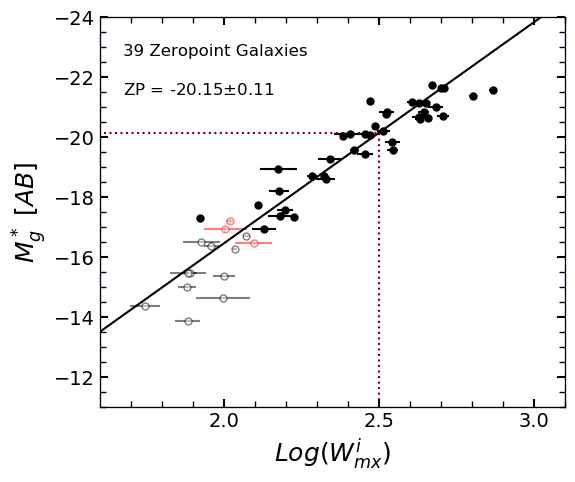

In [8]:
fig, ax = makeFig(band=band, xLim = (1.6,3.1), yLim = (-11,-24), MAGabs=True)



# plotCluster(ax, zp_calibs, offset=0, plotErrors=False, alpha=0.7, 
#             markersize=0, plotFit=True, pgcFaint=I_maglim)

m0 = zp_calibs['slope']
b0 = zp_calibs['zp']
dm0 = zp_calibs['slope_e']
db0 = zp_calibs['zp_e']
mag_ = zp_calibs['MAG']
logWimx_ = zp_calibs['logWimx']
mag_e = zp_calibs['mag_e']
logWimx_e = zp_calibs['logWimx_e']
pgc = zp_calibs['pgc']


mag_w = zp_calibs['MAG_w']
logWimx_w = zp_calibs['logWimx_w']
mag_e_w = zp_calibs['mag_e_w']
logWimx_e_w = zp_calibs['logWimx_e_w']
pgc_w = zp_calibs['pgc_w']

dye = {"u":"blue","g":"green","r":"red","i":"orange","z":"maroon","w1":"purple", 'w2': "brown"}


indx = []
indx_ = []    
for i, id in enumerate(pgc):
    if not id in calib_maglim:
        indx.append(i)
    else:
        indx_.append(i)  




ax.errorbar(logWimx_[indx], mag_[indx], fmt='o',  
                        markersize=5,
                    xerr=logWimx_e[indx], color = 'k')



indxS = []
indx_S = []    
for i, id in enumerate(pgc_w):
    if not id in [42407]:
        indxS.append(i)
    else:
        indx_S.append(i)

ax.errorbar(logWimx_w[indxS], mag_w[indxS], fmt='o',  
                        markersize=5,
                    xerr=logWimx_e_w[indxS], yerr=mag_e_w[indxS], color = 'red', alpha=0.5, markerfacecolor='white')

ax.errorbar(logWimx_w[indx_S], mag_w[indx_S], fmt='o',  
                        markersize=5,
                    xerr=logWimx_e_w[indx_S], yerr=mag_e_w[indx_S], color = 'red', alpha=0.5)





if len(indx_)>0:
            ax.errorbar(logWimx_[indx_], mag_[indx_], fmt='o',  
                    xerr=logWimx_e[indx_], color='k', markersize=5, alpha=0.5, markerfacecolor='white')


x = np.linspace(-5,5,50)
y = slope*(x-2.5)+zp
ax.plot(x,y, 'k-')  

x0 = 2.5
y0 = 100
x1 = 2.5
y1 = slope*(x1-2.5)+zp
ax.plot([x0,x1],[y0,y1], ':', color='maroon') 

x2 = -5
y2 = y1
x3 = x1
y3 = y1
ax.plot([x2,x3],[y2,y3], ':', color='maroon')   



print m0, b0
N = len(logWimx_[indx])


Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
x0 = 0.95*Xlm[0]+0.05*Xlm[1]
y0 = 0.1*Ylm[0]+0.90*Ylm[1]
ax.text(x0,y0, "%d" % N+' Zeropoint Galaxies', fontsize=12, color='k')
y0 = 0.2*Ylm[0]+0.80*Ylm[1]
ax.text(x0,y0, "ZP = "+"%.2f" % b0+'$\pm$'+"%.2f" % db0, fontsize=12, color='k')

rms,RMS = rmsMaker(logWimx_[indx], mag_[indx], logWimx_e[indx], slope, zp, pgc=pgc[indx])
print band, N, '%.2f'%b0, '%.2f'%db0[0], '%.2f'%rms, '%.2f'%RMS


if band=='i':
    x = np.linspace(1.6,2.4,20)
    ax.plot(x,-17*x/x,'--', lw=1, color='navy')
#     ax.text(2.45,-16.8, r'$M_{i^*}=-17$'+' mag', fontsize=11, color='navy')

if band=='w1':
    x = np.linspace(1.6,2.4,20)
    s = (1.177393433782687, 0.009308586408508734, 0.0091001076648074)
    z = (-0.47163516612878476, 0.0016568251714184634, 0.0016403255312730791)
    ax.plot(x,-17-(s[0]*(x-2.5)+z[0]),'r--', lw=1)